**Hello Folks!!**

Over 400 million men and women have a kind of cardiovascular illness. 1/3 of all global deaths are the results of heart disease and stroke. 

Lets analyse and predict if person with certain physical report have illness or not.

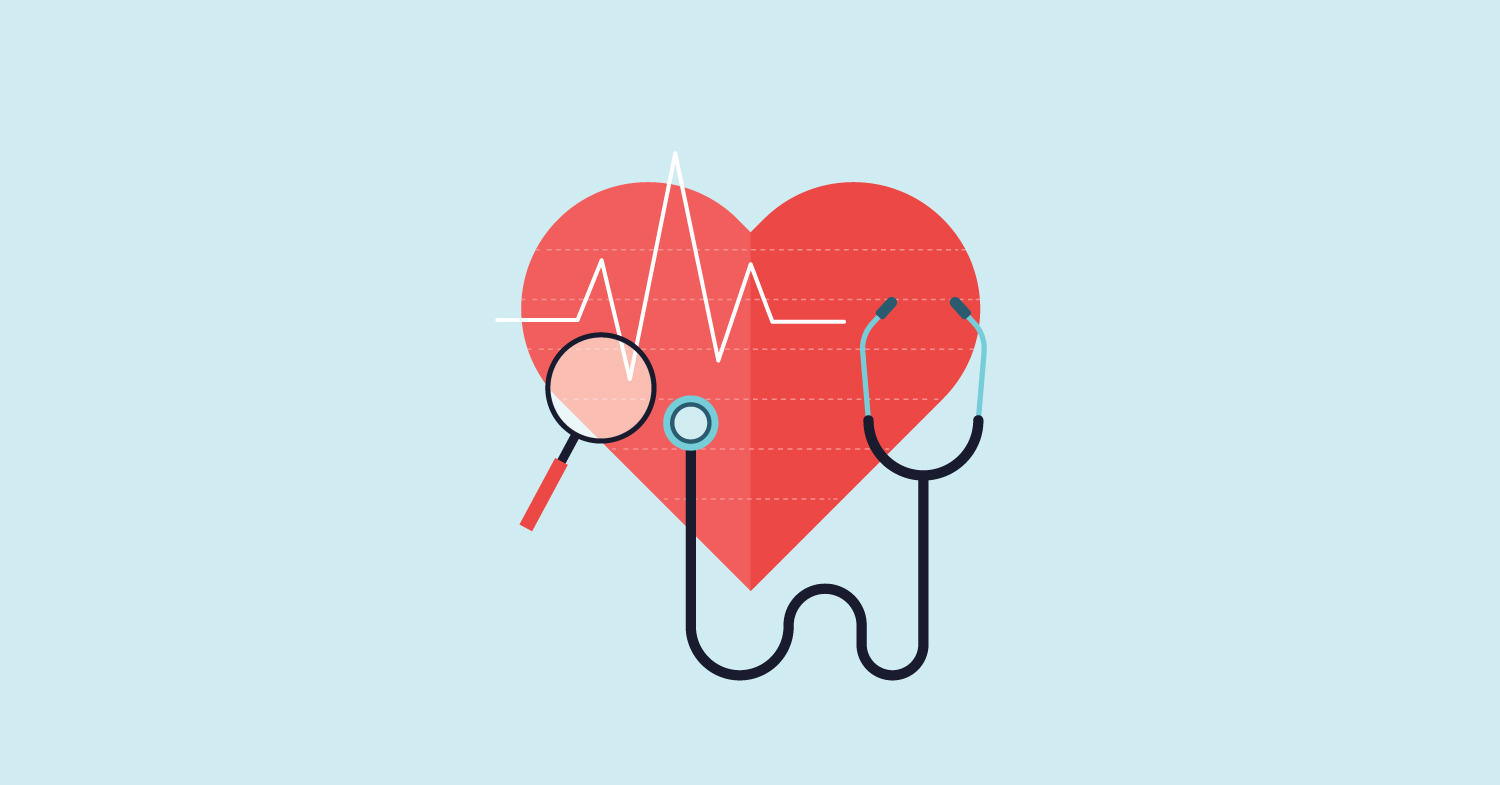

In [1]:
from PIL import Image
Image.open('heart.jpg')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm
from xgboost import XGBClassifier

In [3]:
heart=pd.read_csv('heart.csv')
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
print('Number of records in dataset are {} and Features are {}.  '.format(*heart.shape))
print("\nAny missing sample in set:",heart.isnull().values.any())

Number of records in dataset are 303 and Features are 14.  

Any missing sample in set: False


### Descriptive Statistics

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Categorical Features** :  'sex', 'cp',  'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'


**Numerical Features** : 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

In [6]:
#Some changes for better visualization

heart1=heart.copy()
heart1['target']=heart1['target'].map({1:'Unwell',0:'Healthy'})
heart1['cp']=heart1['cp'].map({0:'Typical Angina',1:'Atypical Angina',2:'Non-Anginal',3:'Asymptomatic'}).astype('object')
heart1['fbs']=heart1['fbs'].map({1:'>120 mg/dl',0:'<120 mg/dl'})
heart1['restecg']=heart1['restecg'].map({0:'normal',1:'ST-T abnormality',2:'probable_LVH'})
heart1['exang']=heart1['exang'].map({1:'Yes',0:'No'})

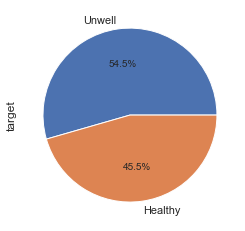

In [7]:
heart1['target'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

# 1) Feature Description

##  Continous Features

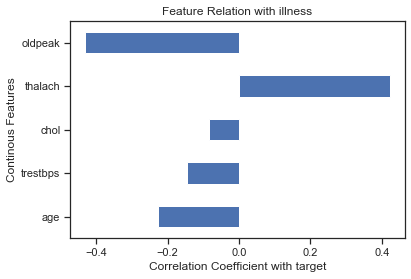

In [8]:
heart[['age', 'trestbps','chol','thalach','oldpeak','target']].corr()['target'][:-1].plot.barh()
plt.title("Feature Relation with illness")
plt.xlabel('Correlation Coefficient with target')
plt.ylabel('Continous Features')
plt.show()

* Among Continuous feature oldpeak and thalach are most significant in determining disease.
* Lets analysis each feature independently.

### 1.1) chol: Cholesterol in mg/dl

* Cholesterol is a waxy, fat-like substance that's found in all the cells in your body. 
* Your liver makes cholesterol, and it is also in some foods, such as meat and dairy products. 
* Your body needs some cholesterol to make hormones, vitamin D, and substances that help you digest foods.
* Your body makes all the cholesterol it needs. But if you have too much cholesterol in your blood, you have a higher risk of coronary artery disease.

https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html

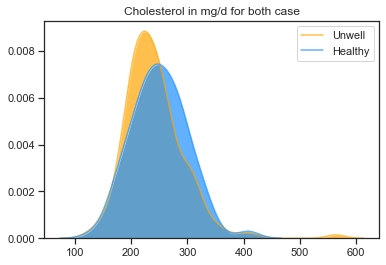

In [9]:
sns.kdeplot(heart1[heart1['target']=='Unwell']['chol'],shade=True,color="orange", label="Unwell", alpha=.7)
sns.kdeplot(heart1[heart1['target']=='Healthy']['chol'],shade=True,color="dodgerblue", label="Healthy", alpha=.7)
plt.title('Cholesterol in mg/d for both case')
plt.show()

* Some persons are having very high Cholesterol hence are on high risk of illness.

### 1.2) trestbps: Resting Blood Pressure 
#### (mm Hg on admission to the hospital)


* Blood pressure (BP) is the pressure of circulating blood on the walls of blood vessels. 
* Blood pressure is usually expressed in terms of the systolic pressure (maximum during one heartbeat) over diastolic pressure (minimum in between two heartbeats) and is measured in millimeters of mercury (mmHg).


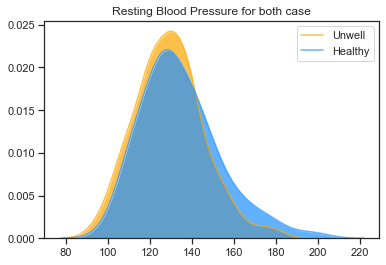

In [10]:
sns.kdeplot(heart1[heart1['target']=='Unwell']['trestbps'],shade=True,color="orange", label="Unwell", alpha=.7)
sns.kdeplot(heart1[heart1['target']=='Healthy']['trestbps'],shade=True,color="dodgerblue", label="Healthy", alpha=.7)
plt.title('Resting Blood Pressure for both case')
plt.show()

* There isn't any significant difference in both cases in distribution plot. Detailed bifurcation can be seen from below table.

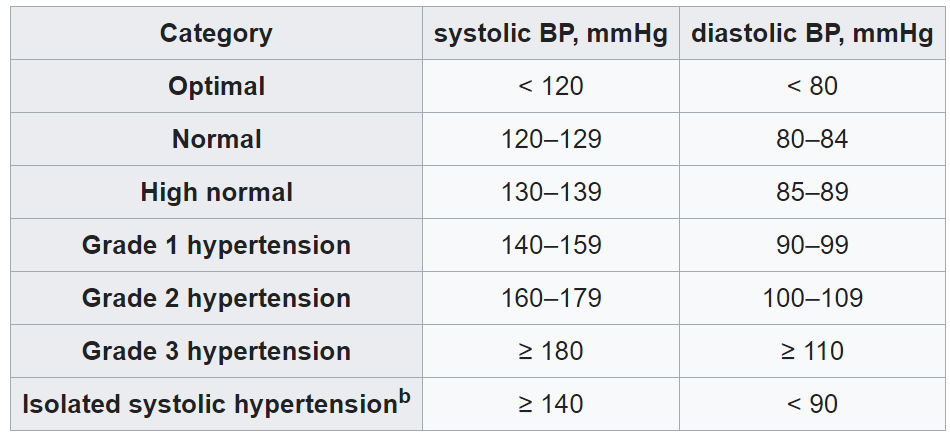

In [11]:
Image.open('blood pressure.png')

### 1.3) thalach: Maximum Heart Rate Achieved

* A normal resting heart rate for adults ranges from 60 to 100 beats per minute.

* To measure your heart rate, simply check your pulse. Place your index and third fingers on your neck to the side of your windpipe. To check your pulse at your wrist, place two fingers between the bone and the tendon over your radial artery — which is located on the thumb side of your wrist.

* When you feel your pulse, count the number of beats in 15 seconds. Multiply this number by four to calculate your beats per minute.

https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979

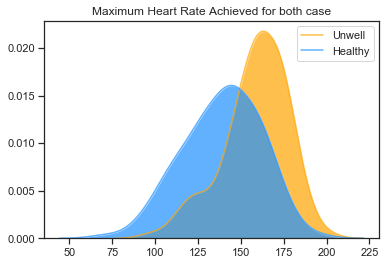

In [12]:
sns.kdeplot(heart1[heart1['target']=='Unwell']['thalach'],shade=True,color="orange", label="Unwell", alpha=.7)
sns.kdeplot(heart1[heart1['target']=='Healthy']['thalach'],shade=True,color="dodgerblue", label="Healthy", alpha=.7)
plt.title('Maximum Heart Rate Achieved for both case')
plt.show()

* Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness. For example, a well-trained athlete might have a normal resting heart rate closer to 40 beats per minute.
* We dont have record of an well-trained athlete here it seems :)


### 1.4) oldpeak: ST depression induced by exercise relative to rest

* ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.
* In a cardiac stress test, **an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia**, while an exercise stress test requires an ST depression of at least 2 mm to significantly indicate reversible ischaemia.

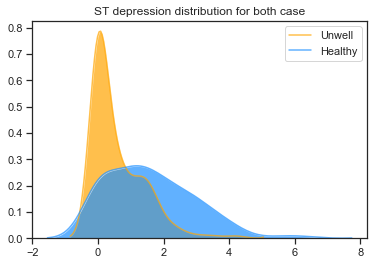

In [13]:
sns.kdeplot(heart1[heart1['target']=='Unwell']['oldpeak'],shade=True,color="orange", label="Unwell", alpha=.7)
sns.kdeplot(heart1[heart1['target']=='Healthy']['oldpeak'],shade=True,color="dodgerblue", label="Healthy", alpha=.7)
plt.title('ST depression distribution for both case')
plt.show()

* As an ST depression of at least 1 mm after adenosine administration indicates a reversible ischaemia, which can be easily seen from concentration of positive cases towards lower side.

### Checking For Outliers

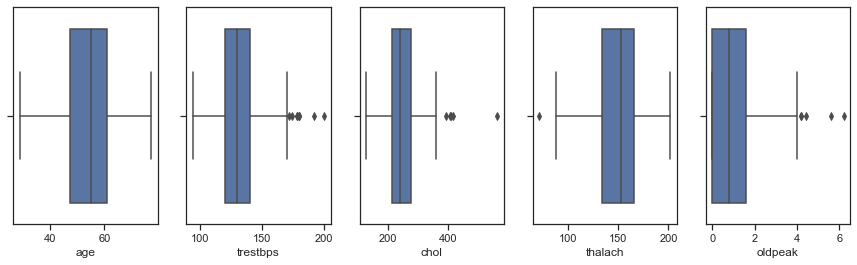

In [14]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15,4))
for i,col in enumerate(cols,1):
   plt.subplot(1,5,i)
   sns.boxplot(heart[col])
   plt.xlabel(col)  
plt.show()

* There are extreme values in most of the quantitative variables and it is obvious to get such values as patients with critical conditions can have abnormal values of these variables. So we will not be treating these outliers.

## Categorical Features

In [15]:
Categorical_Features=['sex','cp','exang','fbs','thal','restecg','slope','ca']
pd.DataFrame(heart[Categorical_Features].nunique(),columns=['Unique_counts'])

,Unique_counts
sex,2
cp,4
exang,2
fbs,2
thal,4
restecg,3
slope,3
ca,5


### 1.5) cp: Chest Pain Experienced 

Our dataset have following 4 types of values.
* Typical angina, 

* Atypical angina, 

* Non-anginal pain, 

* Asymptomatic(producing or showing no symptoms)

Where,
* Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. 
* Angina pain may even feel like indigestion. But, angina is not a disease.

Two types of angina are :

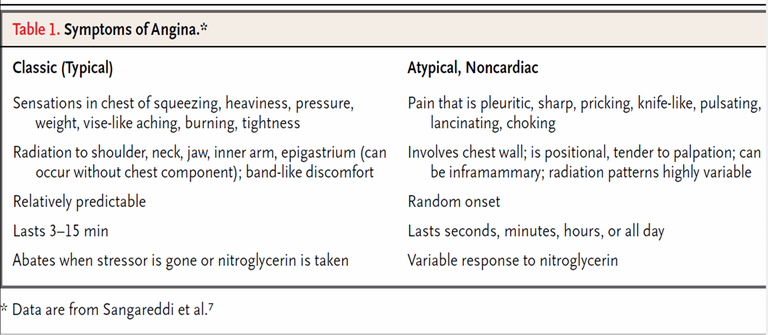

In [16]:
Image.open('angina.png')

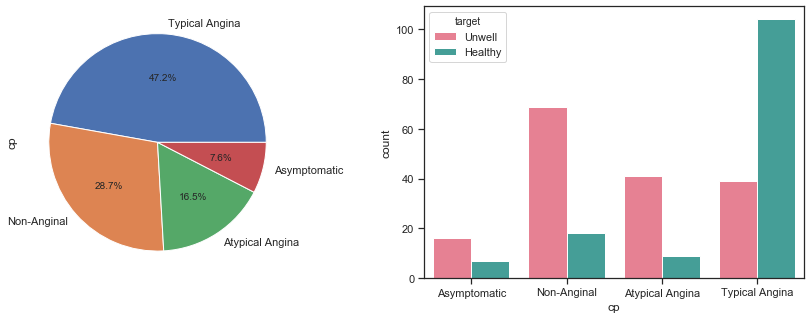

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['cp'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='cp',data=heart1,palette='husl')
plt.show()

### 1.6) exang: Exercise Induced Angina 
#### (1 = yes; 0 = no)

* Stable angina is usually triggered by physical activity.
* When you climb stairs, exercise or walk, your heart demands more blood, but narrowed arteries slow down blood flow.

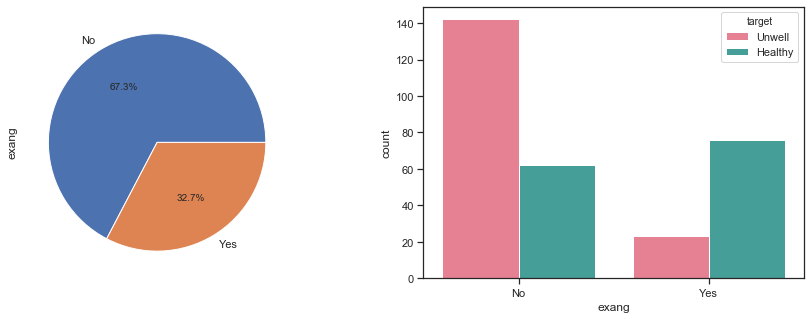

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['exang'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='exang',data=heart1,palette='husl')
plt.show()

### 1.7) fbs: Fasting blood sugar
#### (> 120 mg/dl, 1 = true; 0 = false)

* A test is done in the morning to determine how much glucose (sugar) is in a blood sample after an overnight fast. The fasting blood glucose test is commonly used to detect diabetes mellitus.



* 70-100 mg/dl        : The normal range for blood glucose. 

* 100-126 mg/dl       : Impaired fasting glucose or pre-diabetes. 

* 126 mg/dl or higher : Diabetes need to be diagnosed.



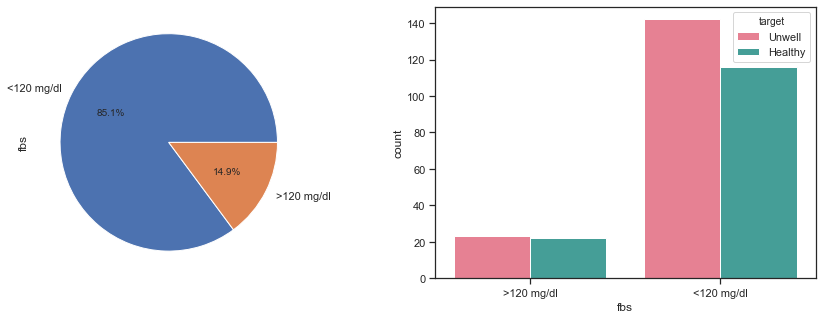

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['fbs'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='fbs',data=heart1,palette='husl')
plt.show()

### 1.8) thal: A blood disorder called thalassemia
#### ( normal;  fixed defect; reversable defect)


* Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. Hemoglobin is the protein in red blood cells that carries oxygen. 
* The disorder results in large numbers of red blood cells being destroyed, which leads to anemia.`

**Just some random info:**

Former tennis player **Pete Sampras** and soccer player **Zinedine Zidane** are known to be a Thalassemia minor patient.

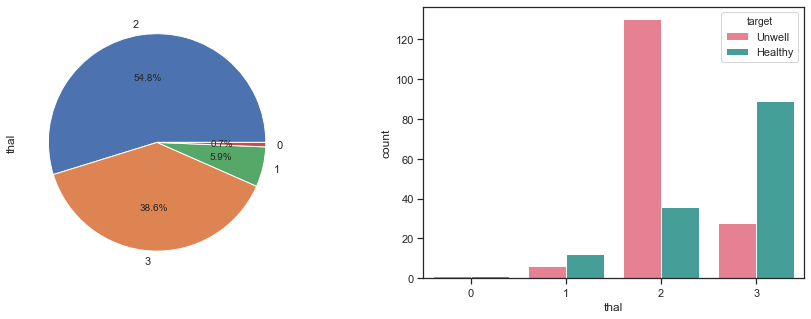

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['thal'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='thal',data=heart1,palette='husl')
plt.show()

### 1.9) restecg: Resting electrocardiographic measurement
####  (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


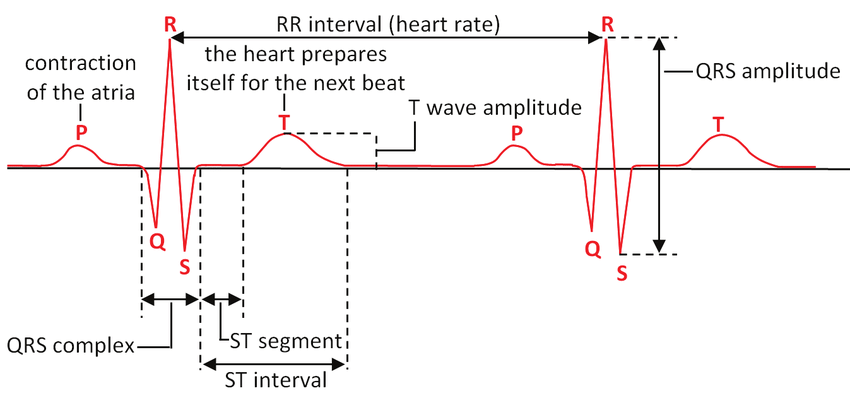

In [21]:
Image.open('The-description-of-the-ECG-curve.png')


* **The ST segment** is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave. The ST Segment represents the interval between ventricular depolarization and repolarization.

* The most important cause of ST segment abnormality (elevation or depression) is myocardial ischaemia or infarction. **Myocardial ischemia** occurs when blood flow to the heart muscle (myocardium) is obstructed by a partial or complete blockage of a coronary artery by a buildup of plaques (atherosclerosis). If the plaques rupture, you can have a heart attack (myocardial infarction)`

* **Left ventricular hypertrophy, or LVH**, is a term for a heart’s left pumping chamber that has thickened and may not be pumping efficiently. Sometimes problems such as aortic stenosis or high blood pressure overwork the heart muscle. In response to this pressure overload, the inner walls of the heart may respond by getting thicker. These thickened walls can cause the left ventricle to weaken, stiffen and lose elasticity, which may prevent healthy blood flow.

https://litfl.com/st-segment-ecg-library/

https://www.heart.org/en/health-topics/heart-valve-problems-and-disease/heart-valve-problems-and-causes/what-is-left-ventricular-hypertrophy-lvh

https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/left-ventricular-hypertrophy-review

https://www.youtube.com/watch?v=xIZQRjkwV9Q

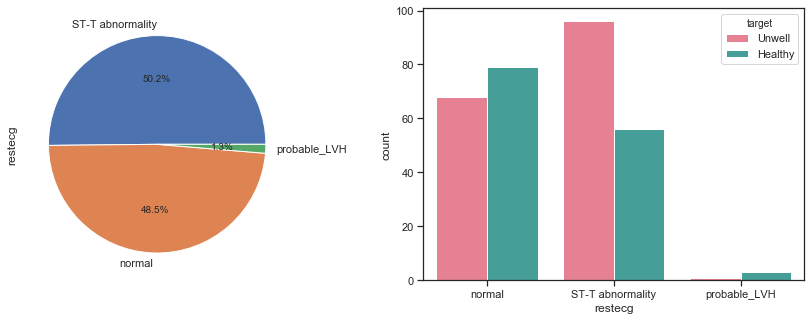

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['restecg'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='restecg',data=heart1,palette='husl')
plt.show()

### 1.10) slope: Slope of the peak exercise ST segment 
#### ( upsloping, flat,  downsloping)

In [23]:
heart1.groupby(['slope','target'])['slope','target'].size().unstack()

target,Healthy,Unwell
slope,,
0,12,9
1,91,49
2,35,107


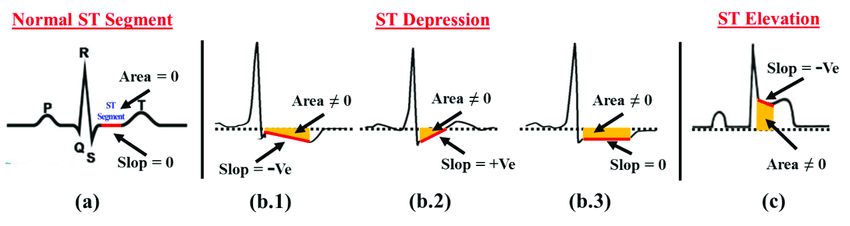

In [24]:
Image.open('st_depression.png')

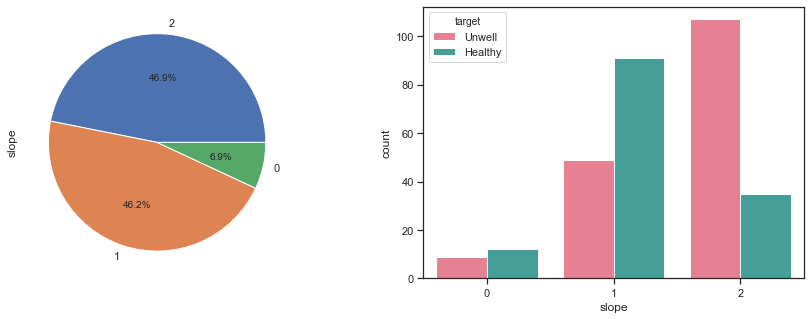

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['slope'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='slope',data=heart1,palette='husl')
plt.show()

### 1.11) ca: The number of major vessels (0-4)

* **Fluoroscopy** is used to help the healthcare provider see the flow of blood through the coronary arteries to check for arterial blockages.

* Fluoroscopy is a study of moving body structures. It’s much like an X-ray "movie" and is often done while a contrast dye moves through the part of the body being examined. A continuous X-ray beam is passed through the body part and sent to a video monitor so that the body part and its motion can be seen in detail. Fluoroscopy, as an imaging tool, allows healthcare providers to look at many body systems, including the skeletal, digestive, urinary, cardiovascular, respiratory, and reproductive systems.

* Fluoroscopy may be used to evaluate specific areas of the body. These include the bones, bowel, muscles, heart vessels, and joints.

* If both age and the number of vessels calcified are considered, fluoroscopy can provide useful information regarding the **presence of stenosis** in young and middle-aged patients.

* Vascular calcifications are mineral deposits on the walls of your arteries and veins. These mineral deposits sometimes stick to fatty deposits, or plaques, that are already built up on the walls of a blood vessel. Vascular calcifications are common but potentially serious.

https://pubmed.ncbi.nlm.nih.gov/3341167/

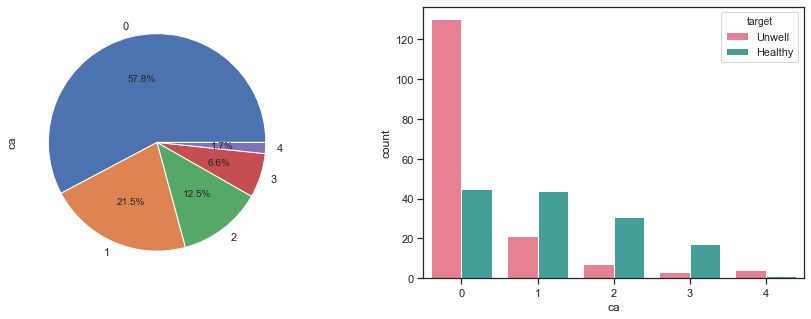

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
heart1['ca'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

plt.subplot(122)
sns.countplot(hue='target',x='ca',data=heart1,palette='husl')
plt.show()

## 2) Prediction

In [27]:
X=heart.drop('target',axis=1)
y=heart['target']

#Split the data into train and test set:(70/30)
x_trains,x_tests, y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=3)

####  Preparing an array with all the algorithms

In [28]:
models = []

models.append(('NB', BernoulliNB() ))
models.append(('LOGREG', LogisticRegression() ))
models.append(('DT', DecisionTreeClassifier() ))
models.append(('BAGGED_DT', BaggingClassifier() ))
models.append(('RFC', RandomForestClassifier() ))
#models.append(('KNN', KNeighborsClassifier() ))   #Use if data is scaled
models.append(('ADA', AdaBoostClassifier() ))
models.append(('SVM', SVC() ))
models.append(('LGBM', lightgbm.LGBMClassifier() ))
models.append(('XGB', XGBClassifier() ))

models

[('NB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('LOGREG',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('DT',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('BAGGED_DT',
  BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                    

####  Every algorithm is tested and results are collected 


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

results_train = []
results_test = []
names = []
df_results=pd.DataFrame()

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=10, random_state=3, shuffle=True)
    
    trainf1 =cross_val_score(model,x_trains,y_train,cv=kfold, scoring='f1_weighted')
    trainacc =cross_val_score(model,x_trains,y_train,cv=kfold, scoring='accuracy')
    trainpre =cross_val_score(model,x_trains,y_train,cv=kfold, scoring='precision_weighted')
    trainre =cross_val_score(model,x_trains,y_train,cv=kfold, scoring='recall_weighted')
    trainroc =cross_val_score(model,x_trains,y_train,cv=kfold, scoring='roc_auc')
    results_train.append(trainroc)
    
    
    
    
    testf1 = cross_val_score(model, x_tests, y_test,cv=kfold, scoring='f1_weighted')
    testacc =cross_val_score(model,x_tests,y_test,cv=kfold, scoring='accuracy')
    testpre =cross_val_score(model,x_tests,y_test,cv=kfold, scoring='precision_weighted')
    testre =cross_val_score(model,x_tests,y_test,cv=kfold, scoring='recall_weighted')
    testroc =cross_val_score(model,x_tests,y_test,cv=kfold, scoring='roc_auc')
    results_test.append(testroc)
    
    
    df_results = pd.concat([df_results,\
                            pd.DataFrame(np.array([name,round(trainf1.mean(),2),round(testf1.mean(),2),\
                                                   round(trainacc.mean(),2),round(testacc.mean(),2),\
                                                   round(trainpre.mean(),2),round(testpre.mean(),2),\
                                                   round(trainre.mean(),2),round(testre.mean(),2),\
                                                   round(trainroc.mean(),2),round(testroc.mean(),2) ]).reshape(1,-1),
                                         columns=['Description','F1score_train','F1score_test',\
                                                  'Accuracy_train','Accuracy_test','Precision_train','Precision_test',\
                                                  'Recall_train','Recall_test','Roc_auc_train','Roc_auc_test']  )
                           ], axis=0)
    
df_results

,Description,F1score_train,F1score_test,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,Roc_auc_train,Roc_auc_test
0,NB,0.77,0.86,0.77,0.87,0.8,0.89,0.77,0.87,0.87,0.94
0,LOGREG,0.82,0.8,0.83,0.81,0.84,0.85,0.83,0.81,0.87,0.88
0,DT,0.73,0.76,0.73,0.78,0.75,0.85,0.73,0.77,0.75,0.78
0,BAGGED_DT,0.78,0.82,0.75,0.82,0.75,0.85,0.75,0.79,0.83,0.92
0,RFC,0.78,0.84,0.79,0.87,0.79,0.85,0.79,0.86,0.86,0.95
0,ADA,0.78,0.8,0.78,0.8,0.8,0.82,0.78,0.8,0.82,0.81
0,SVM,0.6,0.43,0.61,0.58,0.67,0.34,0.61,0.58,0.73,0.73
0,LGBM,0.8,0.83,0.8,0.83,0.82,0.86,0.8,0.83,0.86,0.92
0,XGB,0.79,0.82,0.79,0.82,0.81,0.86,0.79,0.82,0.85,0.93


#### Boxplot Algorithm Comparison

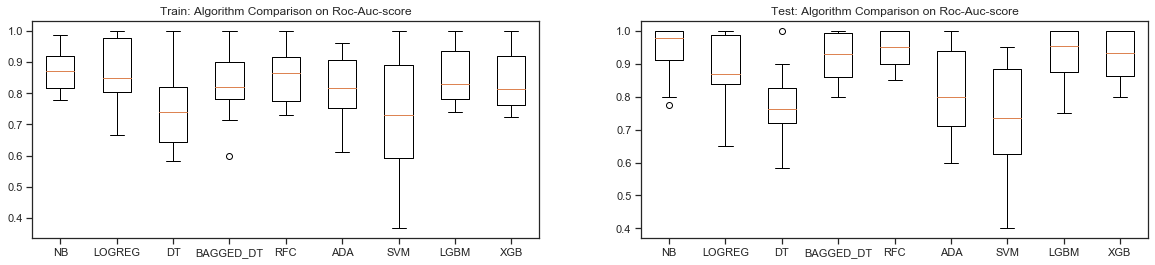

In [30]:
plt.figure(figsize=(20,4))

plt.subplot(121)
plt.title('Train: Algorithm Comparison on Roc-Auc-score')
plt.boxplot(results_train,labels=names)

plt.subplot(122)
plt.title('Test: Algorithm Comparison on Roc-Auc-score')
plt.boxplot(results_test,labels=names,manage_ticks=True)
plt.show()


* Above boxplots are based on AUC score.
* Logistic Regression, SVM and ADABoost model are having high variance error compared to other classification models.
* Random Forest, LightGBM, XGBoost, Naive Bayes are the models with low bias error and also low variance error.
* Model selection is also based on metric to be considered, we can choose recall or precision as per requirement by health specialist and hence we can manipulate our model selection accordingly.